In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
#importing necessary packages
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
import pickle
from joblib import dump
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier
sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from scipy.stats import ttest_ind


In [15]:
train=pd.read_csv('Paitients_Files_Train.csv')
test=pd.read_csv('Paitients_Files_Train.csv')


In [17]:
train.head()



,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [18]:
test.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [21]:
#printing the shape of the dataset
print("Shape of train dataset:", train)
print("Shape of test dataset:", test)

Shape of train dataset:             ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]
Shape of test dataset:     

In [22]:
# Print the information of the train dataset
print("Train Dataset datatypes:")
print(train.dtypes)


Train Dataset datatypes:
ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object


In [23]:
# Print the information of the test dataset
print("\nTest Dataset dataypes:")
print(test.dtypes)


Test Dataset dataypes:
ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object


In [24]:
# Check for null values in the train dataset
print("Null values in train dataset:")
print(train.isnull().sum())

Null values in train dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64


In [25]:
# Check for null values in the test dataset
print("\nNull values in test dataset:")
print(test.isnull().sum())


Null values in test dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64


In [26]:
# Check for duplicated values in the train dataset
print("Duplicated values in train dataset:")
print(train.duplicated().sum())

Duplicated values in train dataset:
0


In [27]:
# Check for duplicated values in the test dataset
print("\nDuplicated values in test dataset:")
print(test.duplicated().sum())


Duplicated values in test dataset:
0


In [28]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Univariant Analysis 


BD2:
count    599.000000
mean       0.481187
std        0.337552
min        0.078000
25%        0.248000
50%        0.383000
75%        0.647000
max        2.420000
Name: BD2, dtype: float64


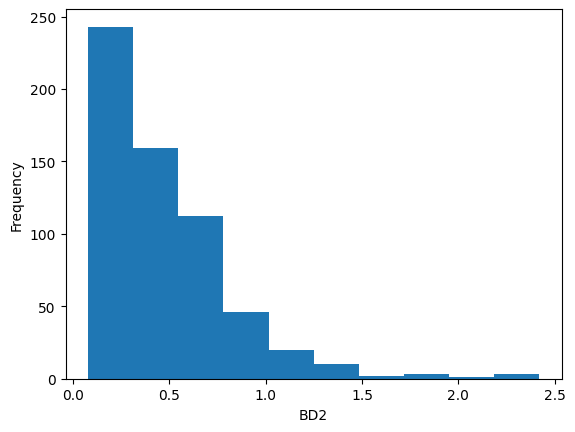

In [31]:
#taking a look at the frequency distribution 
print("\nBD2:")
print(train['BD2'].describe())
plt.hist(train['BD2'], bins=10)
plt.xlabel('BD2')
plt.ylabel('Frequency')
plt.show()


### Distribution: The data appears to be positively skewed (right-skewed) as the mean (0.481187) is greater than the median (0.383000). This suggests that there may be a few higher values that are pulling the mean towards the right.



M11:
count    599.000000
mean      31.920033
std        8.008227
min        0.000000
25%       27.100000
50%       32.000000
75%       36.550000
max       67.100000
Name: M11, dtype: float64


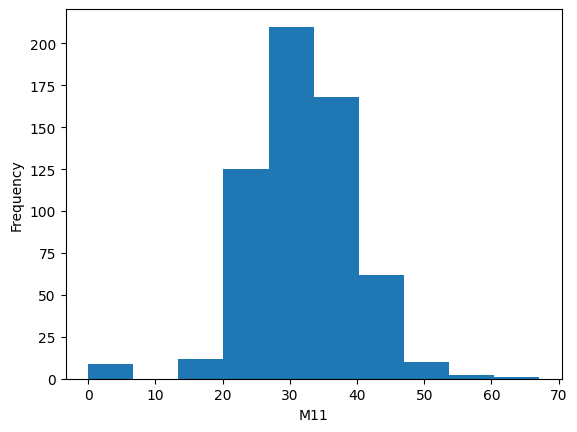

In [33]:
#taking a look at the distribution of the body mass index
print("\nM11:")
print(train['M11'].describe())
plt.hist(train['M11'], bins=10)
plt.xlabel('M11')
plt.ylabel('Frequency')
plt.show()

### Distribution: The data appears to have a relatively symmetrical distribution as the mean (31.920033) is close to the median (32.000000). There is no strong evidence of skewness in the distribution.


PL (Blood Pressure):
count    599.000000
mean     120.153589
std       32.682364
min        0.000000
25%       99.000000
50%      116.000000
75%      140.000000
max      198.000000
Name: PL, dtype: float64


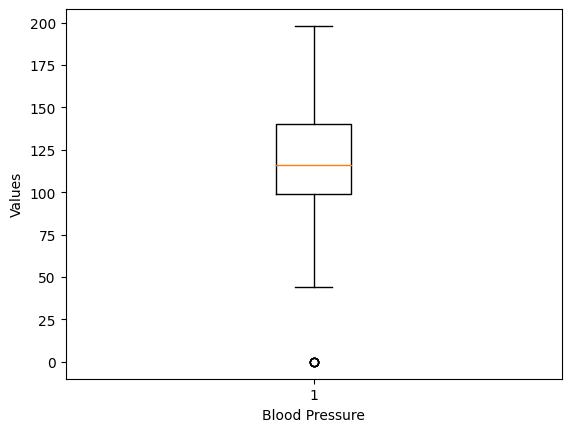

In [35]:
print("\nPL (Blood Pressure):")
print(train['PL'].describe())
plt.boxplot(train['PL'])
plt.xlabel('Blood Pressure')
plt.ylabel('Values')
plt.show()

### It indicates that the majority of the data falls within the interquartile range, with some potential outliers present at both the lower and upper ends of the distribution.

### Bivariant Analysis

In [37]:
# Calculate correlation coefficient between PL and TS
correlation = train['PL'].corr(train['TS'])
print("Correlation coefficient between PL and TS:", correlation)

Correlation coefficient between PL and TS: 0.3398184938822467


### In summary, based on the correlation coefficient, there is a weak positive relationship between PL and TS. It suggests that as PL increases, there tends to be a slight tendency for TS to increase as well, but other factors may play a significant role in determining the cholesterol levels.

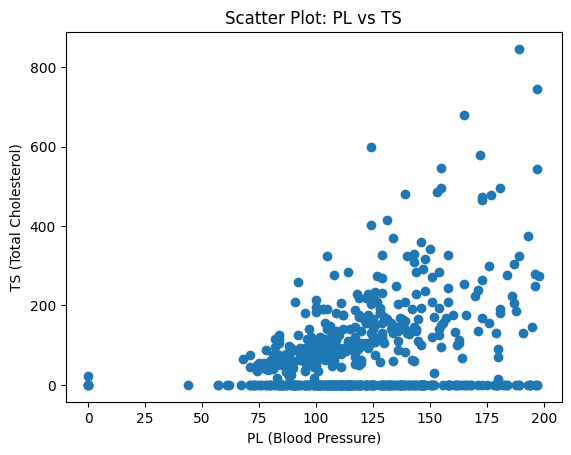

In [38]:
# Create scatter plot of PL vs TS
plt.scatter(train['PL'], train['TS'])
plt.xlabel('PL (Blood Pressure)')
plt.ylabel('TS (Total Cholesterol)')
plt.title('Scatter Plot: PL vs TS')
plt.show()

<Axes: xlabel='Insurance', ylabel='count'>

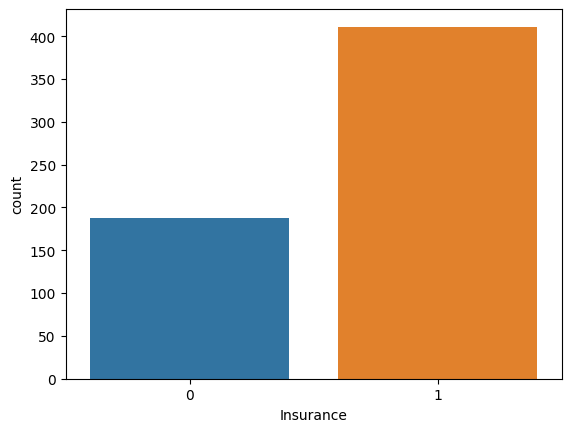

In [39]:
#sepsis Distribution across insurance
# Count plot for "Insurance"
sns.countplot(data=train, x='Insurance')

Text(0, 0.5, 'Count')

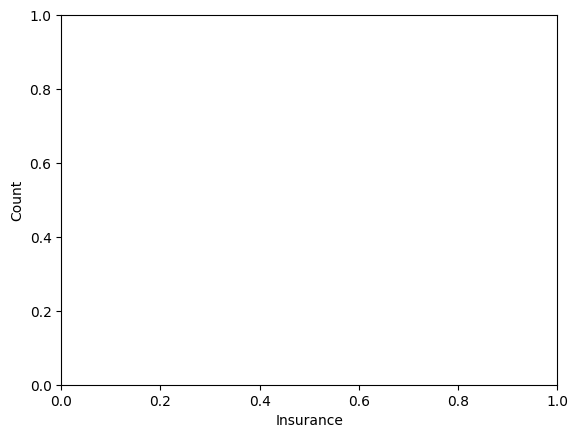

In [47]:
# Set labels
plt.xlabel('Insurance')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Insurance')

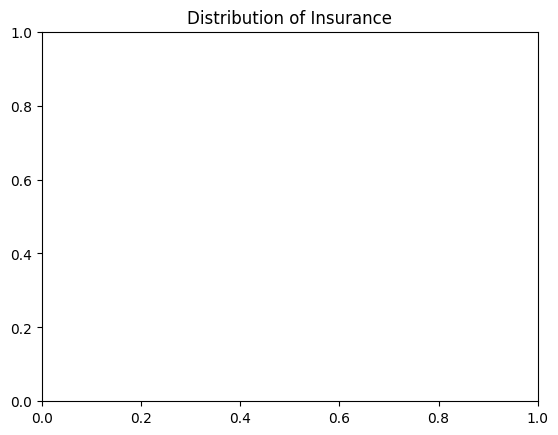

In [41]:
# Set title
plt.title('Distribution of Insurance')

In [42]:
# Calculate percentage distribution
total = len(train['Insurance'])
percentages = train['Insurance'].value_counts(normalize=True) * 100

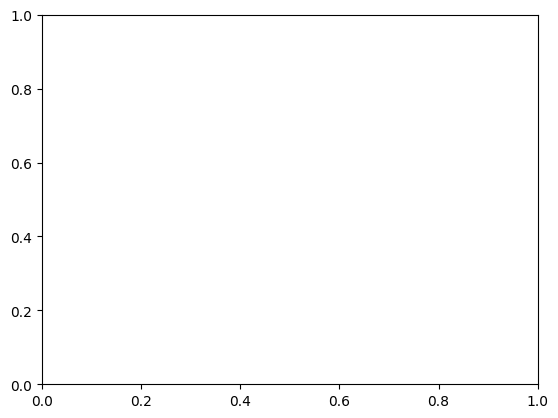

In [43]:
# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

In [44]:
plt.show()

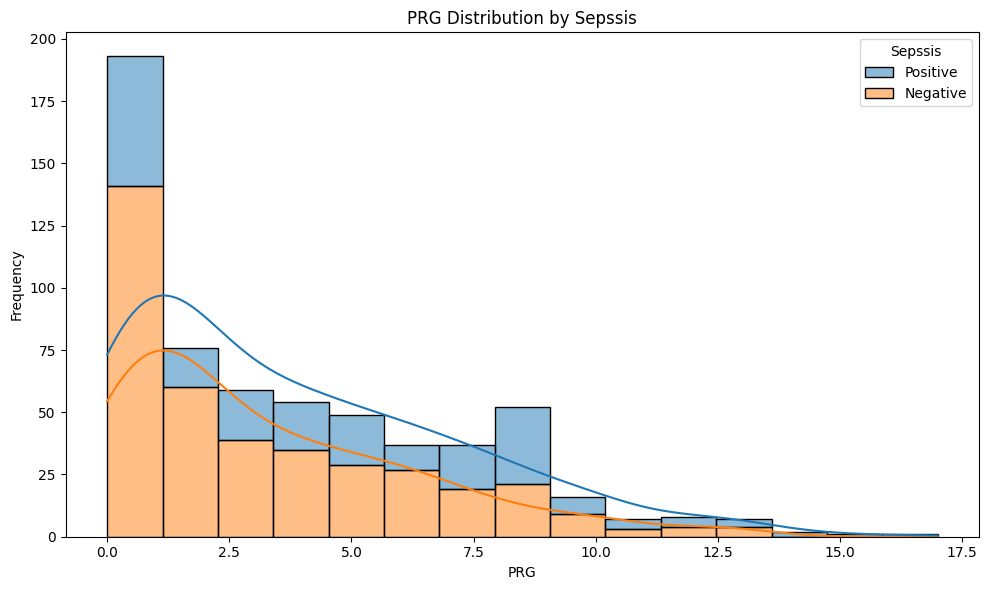

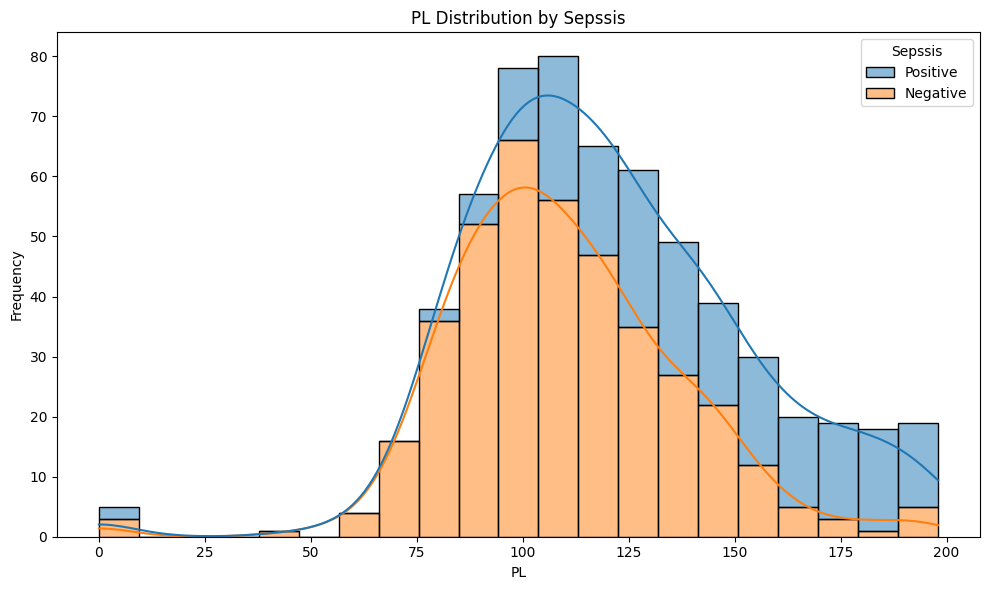

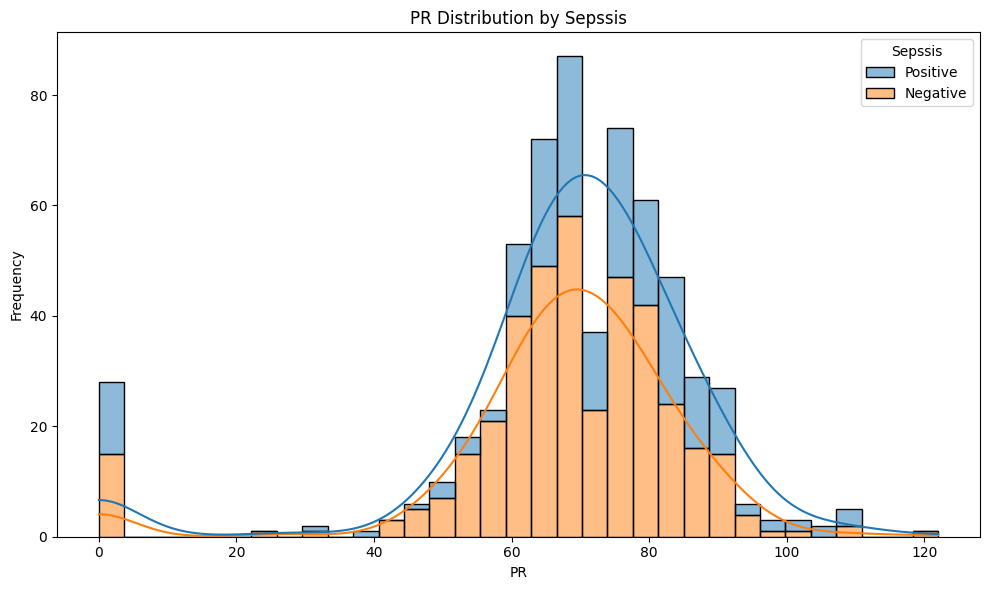

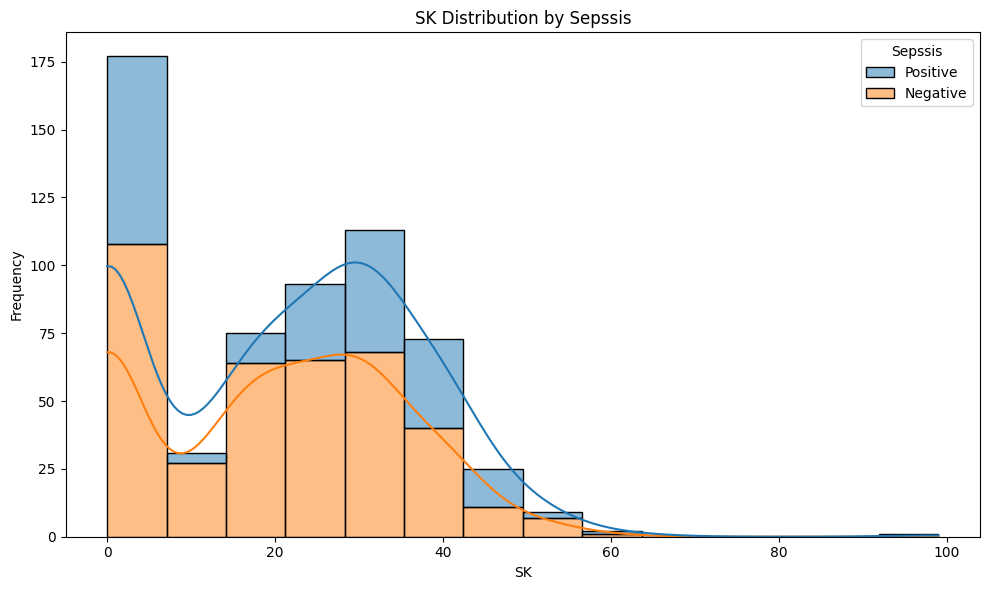

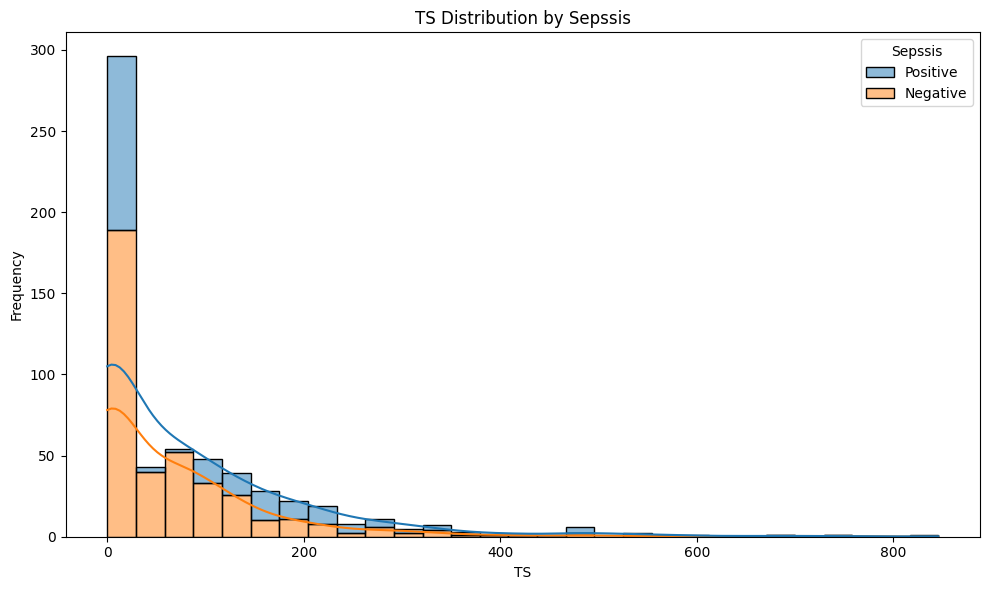

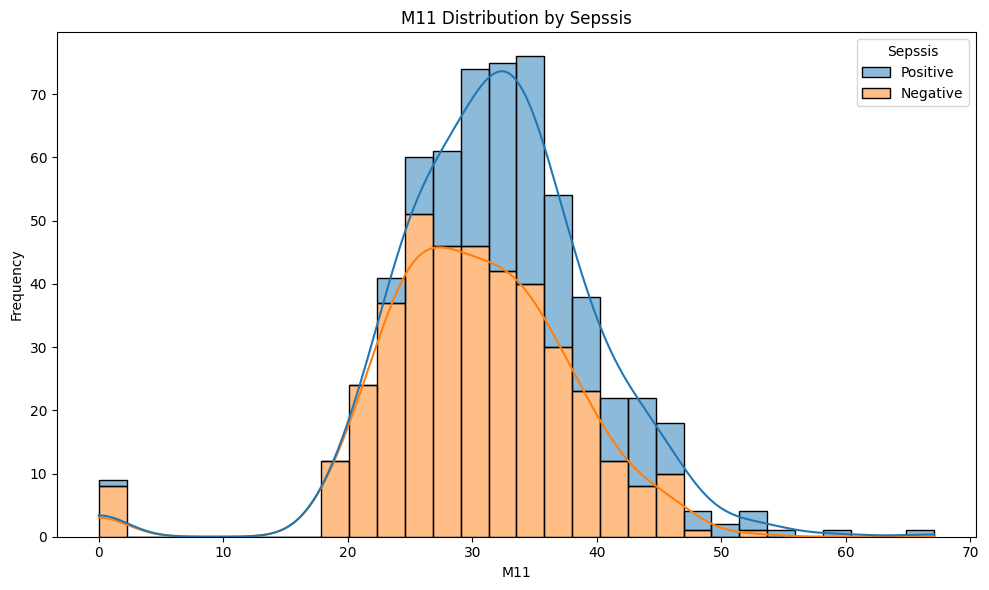

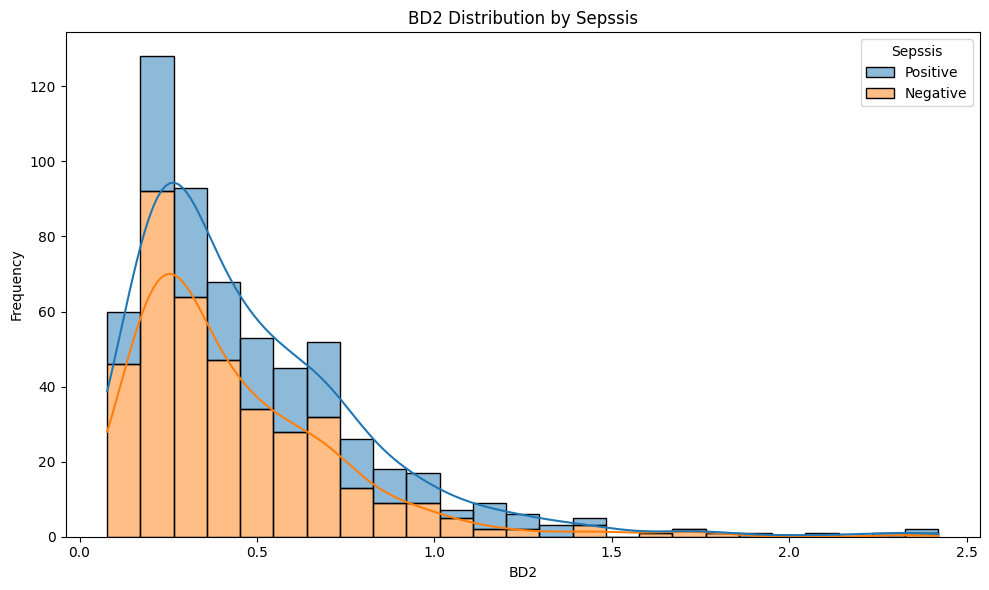

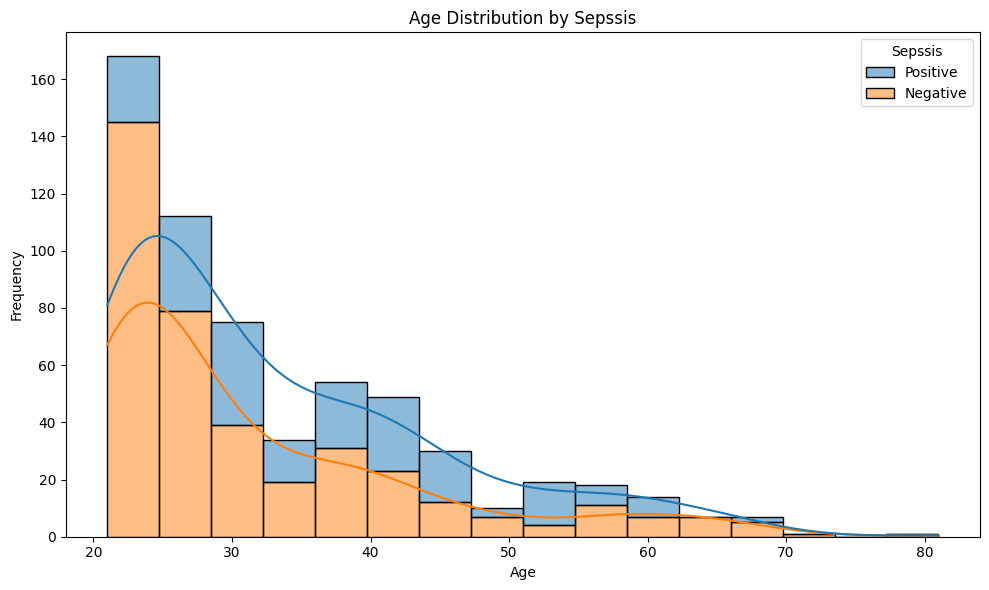

In [48]:
# Numerical Variables - Histograms
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=var, hue='Sepssis', multiple='stack', kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'{var} Distribution by Sepssis')
    
    plt.tight_layout()
    plt.show()

In [55]:
# Perform ANOVA for M11 across different groups of Insurance
model = ols('M11 ~ Insurance', data=train).fit()
anova_table = sm.stats.anova_lm(model)
print("ANOVA results:\n", anova_table)

ANOVA results:
               df        sum_sq    mean_sq        F    PR(>F)
Insurance    1.0     27.598472  27.598472  0.42993  0.512276
Residual   597.0  38323.161128  64.192900      NaN       NaN


### Based on these results, the p-value (0.512276) is greater than the typical significance level (e.g., 0.05), indicating that there is no significant effect of "Insurance" on the variable being analyzed. The null hypothesis, which states that there is no difference in means between the insurance groups, cannot be rejected.

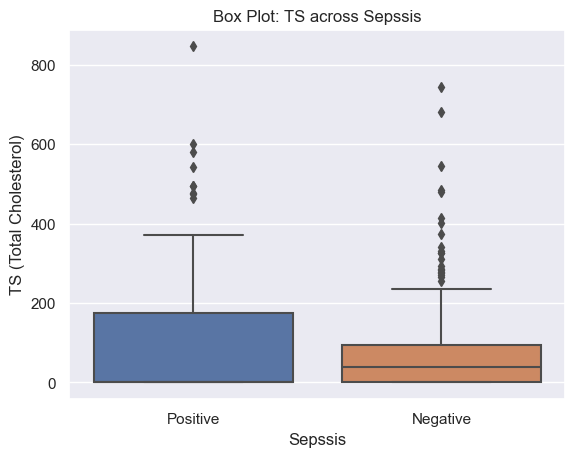

In [56]:
# Create box plot of TS across different categories of Sepssis
sns.boxplot(x='Sepssis', y='TS', data=train)
plt.xlabel('Sepssis')
plt.ylabel('TS (Total Cholesterol)')
plt.title('Box Plot: TS across Sepssis')
plt.show()

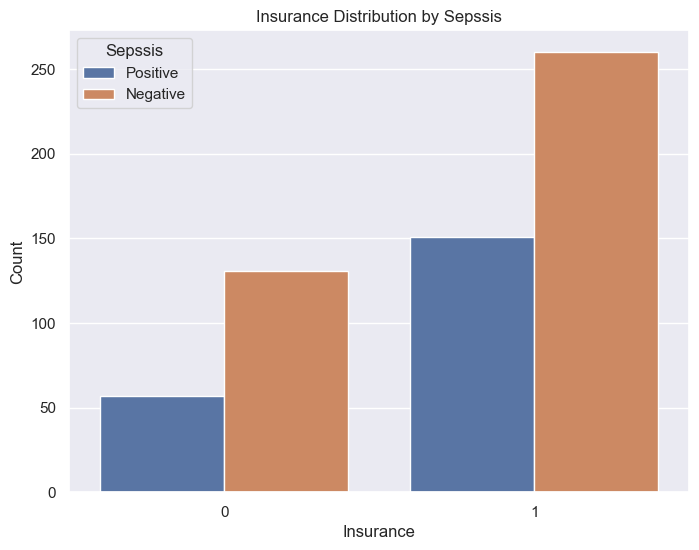

In [57]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train, x=var, hue='Sepssis')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

In [59]:
 # Calculate percentage distribution
total = len(train['Sepssis'])
percentages = train['Sepssis'].value_counts(normalize=True) * 100

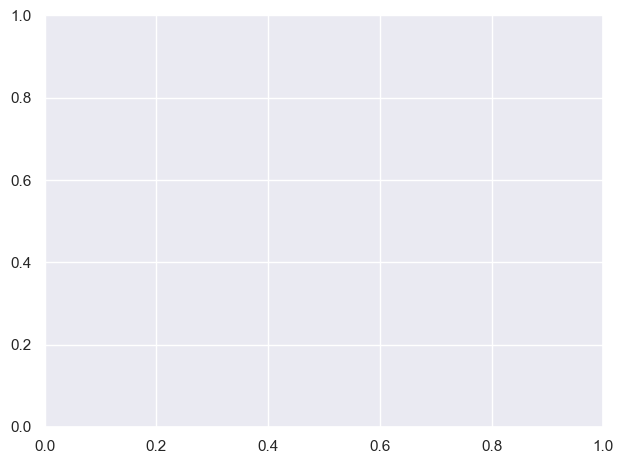

In [60]:
# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Multivariant Analysis

In [61]:
# sepsis count by age range
age_ranges = pd.cut(train['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
grouped_data = train.groupby(age_ranges)

In [62]:
# Calculate the count of 'Sepssis' for each age range
count_sepsis_by_age = grouped_data['Sepssis'].count()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(20, 30]'),
  Text(1, 0, '(30, 40]'),
  Text(2, 0, '(40, 50]'),
  Text(3, 0, '(50, 60]'),
  Text(4, 0, '(60, 70]'),
  Text(5, 0, '(70, 80]'),
  Text(6, 0, '(80, 90]'),
  Text(7, 0, '(90, 100]')])

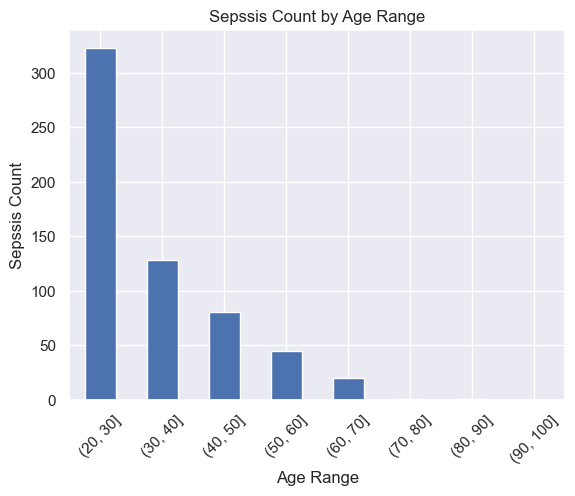

In [63]:
# Plotting the count of 'Sepssis' for each age range
ax = count_sepsis_by_age.plot(kind='bar', xlabel='Age Range', ylabel='Sepssis Count', title='Sepssis Count by Age Range')
plt.xticks(rotation=45)

In [64]:
# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


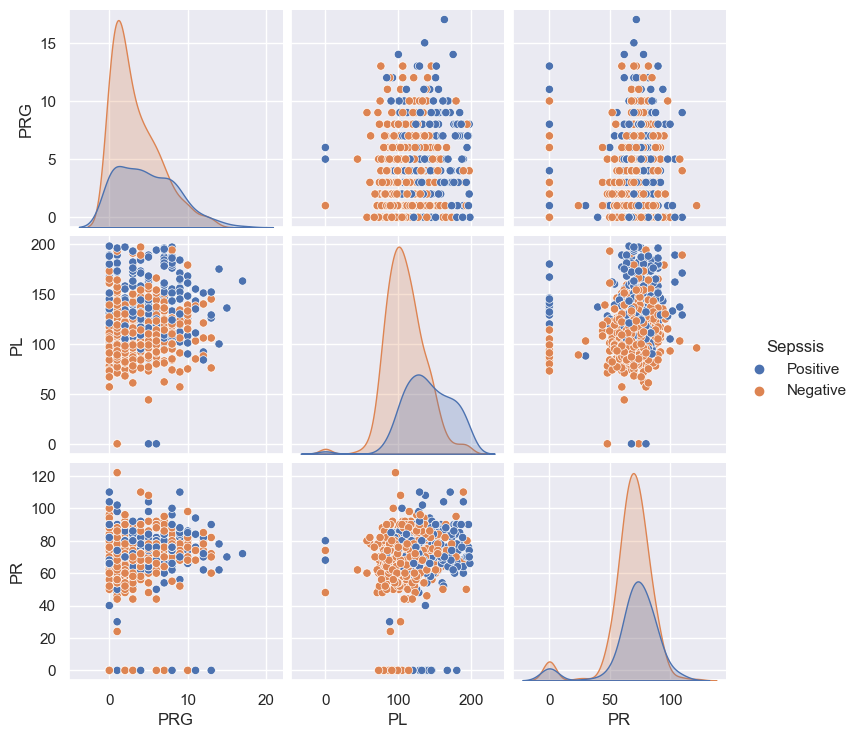

In [65]:
numerical_vars = ['PRG', 'PL', 'PR']
sns.pairplot(data=train, vars=numerical_vars, hue='Sepssis', kind='scatter')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


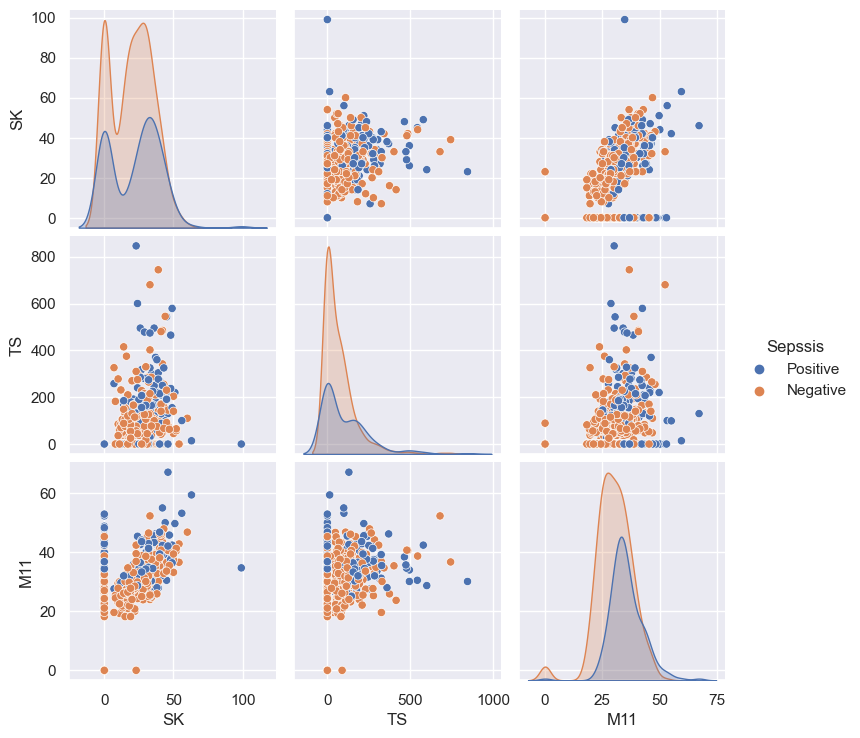

In [66]:
numerical_vars = ['SK', 'TS', 'M11']
sns.pairplot(data=train, vars=numerical_vars, hue='Sepssis')

### Hypothesis Testing

#### Null Hypothesis: There is no significant association between body mass index (BMI) values (M11) and the risk of sepsis.

#### Alternate Hypothesis: There is a significant association between body mass index (BMI) values (M11) and the risk of sepsis.

In [68]:
# Separate the samples based on sepsis occurrence
positive_sepsis = train[train['Sepssis'] == 'Positive']
negative_sepsis = train[train['Sepssis'] == 'Negative']

In [69]:
# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(positive_sepsis['M11'], negative_sepsis['M11'])

In [70]:
# Print the t-test statistic and p-value
print('T-test statistic:', t_statistic)
print('P-value:', p_value)

T-test statistic: 8.134971813407034
P-value: 2.3972519626645312e-15


#### The p-value is significantly smaller than the commonly used significance level of 0.05, indicating strong evidence against the null hypothesis. Therefore, we can reject the null hypothesis and conclude that there is a significant association between body mass index (BMI) values (M11) and the risk of sepsis.

#### Furthermore, since the T-test statistic is positive, it suggests that patients with higher body mass index (BMI) values have a lower risk of sepsis. This provides support for the alternative hypothesis that patients with higher BMI values are less likely to develop sepsis.

#### In summary, the analysis suggests that there is a significant association between body mass index (BMI) values and the risk of sepsis, with higher BMI values being associated with a lower risk of sepsis.

### Feature Processing & Engineering 
### we would clean process and do feature creation

### checking for data imbalnce and outliers

In [72]:
# Check data imbalance
class_counts = train['Sepssis'].value_counts()
print(class_counts)

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64


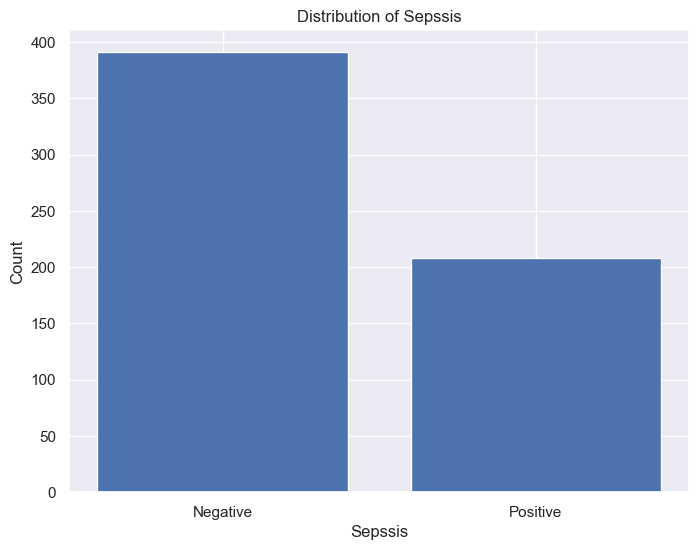

In [73]:
# Visualize data imbalance
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.title('Distribution of Sepssis')
plt.show()

### we can infer that the dataset is imbalance and we would need to do balancing or choose models that can deal with imbalance dataset

In [74]:
# Select numerical columns
numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

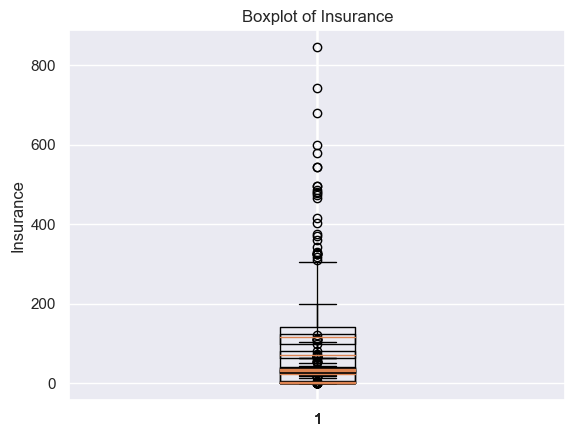

In [75]:
# Iterate over each numerical column
for col in numerical_cols:
    # Create a box plot
    plt.boxplot(train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

In [77]:
 # Get the outliers
outliers = train[train[col] > train[col].quantile(0.75) + 1.5 * (train[col].quantile(0.75) - train[col].quantile(0.25))]  

In [78]:
 # Print the number of outliers
num_outliers = len(outliers)
print(f"Number of outliers in {col}: {num_outliers}")

Number of outliers in Insurance: 0


In [79]:
#Show the plot
plt.show()

In [80]:
def check_duplicate_rows(data):
    duplicate_rows = data.duplicated()
    num_duplicates = duplicate_rows.sum()
    print("Number of duplicate rows:", num_duplicates)

In [81]:
# Check duplicate rows in train data
check_duplicate_rows(train)

Number of duplicate rows: 0


In [82]:
def check_missing_values(data):
    missing_values = data.isna().sum()
    print("Missing values:\n", missing_values)

In [83]:
# Check missing values in train data
check_missing_values(train)

Missing values:
 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64


### Feature Encoding

In [96]:
def encode_target_variable(data, target_variable):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    encoded_target = label_encoder.fit_transform(data[target_variable])
    target_encoded = pd.DataFrame(encoded_target, columns=[target_variable])

In [97]:
    # Combine the features and the encoded target variable
data_encoded = pd.concat([train.iloc[:, :-1], encoded_target], axis=1)
data_encoded.drop('ID', axis=1, inplace=True)

return data_encoded

NameError: name 'encoded_target' is not defined

In [94]:
# Encode target variable in train data
train_encoded = encode_target_variable(train, 'Sepssis')

In [98]:
# Print the encoded train data
print(train_encoded.head())

AttributeError: 'NoneType' object has no attribute 'head'